In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os
from random import *

In [2]:
import csv

trainData = []
testData = []

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    print("Train datas")
    for i in reader:
        #print('[', ct,']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        trainData.append( [ float(i[0]), float(i[1]),float(i[2]),float(i[3]) ] )
        # x = i[0] y = i[1] z = i[2] h = i[3]
        ct += 1

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        testData.append([ float(i[0]) , float(i[1]),float(i[2]),float(i[3])])
        ct += 1


Train datas


In [3]:


def get_y(ths,params) :
    return ths[0] + ths[1]*params[0]+ ths[2]*params[1] + ths[3]*params[2]

# Generate X, Y values
train_x = []
train_y = []
train_z = []
train_yh = []

# Derived in trainData
for i in trainData :
    train_x.append(i[0])
    train_y.append(i[1])
    train_z.append(i[2])
    train_yh.append(i[3])
test_x = []
test_y = []
test_z = []
test_yh = []
for i in testData :
    test_x.append(i[0])
    test_y.append(i[1])
    test_z.append(i[2])
    test_yh.append(i[3])

In [4]:
train_x = torch.FloatTensor(train_x)
train_y = torch.FloatTensor(train_y)
train_z = torch.FloatTensor(train_z)
train_h = torch.FloatTensor(train_yh)

test_x = torch.FloatTensor(test_x)
test_y = torch.FloatTensor(test_y)
test_z = torch.FloatTensor(test_z)
test_h = torch.FloatTensor(test_yh)



In [5]:
# Initialize thetas for hypothesis
th0 = torch.FloatTensor([1.0])
th1 = torch.FloatTensor([1.0])
th2 = torch.FloatTensor([1.0])
th3 = torch.FloatTensor([1.0])

# Setting Step-size. (Learning-rate)
lr = 0.00001


# Setting converge value
loss_conv = 1e-8 # loss converge standard

# Lists for logging
loss_log = []
th0_log = []
th1_log = []
th2_log = []
th3_log = []
epoch_log = []
conv_count = 0 # Variable To count converge
epoch = 0 # Inital epoch value
flag = True

test_loss_log = []


while (True) :
    epoch +=1
    epoch_log.append(epoch)
    
    ## Training data
    # Get y hat value
    yh = th0 + th1*train_x+th2*train_y + th3*train_z
    m = len(yh)
    
    # Get Energy(Loss) value 
    loss = (1/(2*m)) * torch.sum((yh - train_h)**2)
    # Logging Status
    loss_log.append(loss)
    th0_log.append(th0)
    th1_log.append(th1)
    th2_log.append(th2)
    th3_log.append(th3)
    

    ## Testing data
    
    # Get Test yh
    test_yh = th0 + th1*test_x + th2*test_y + th3*test_z
    
    # Get Test loss
    test_m = len(test_yh)
    test_loss = (1/(2*test_m)) * torch.sum((test_yh - test_h)**2)
    test_loss_log.append(test_loss)
    
    
    
    # Updating Parameters - Gradient Descent
    th0 = th0 - lr * (1/m) * torch.sum((yh-train_h))
    th1 = th1 - lr * (1/m) * torch.sum((yh-train_h)*train_x)
    th2 = th2 - lr * (1/m) * torch.sum((yh-train_h)*train_y)
    th3 = th3 - lr * (1/m) * torch.sum((yh-train_h)*train_z)
    
    
    # Check Loss value converge
    if len(loss_log) > 2 :
        if abs(loss_log[-1] - loss_log[-2]) < loss_conv :
            conv_count += 1
        else :
            conv_count = 0
    # For monitor
    '''
    if epoch %1000 == 0 :
        print("epoch {}, th0 {:.5f}, th1 {:.5f}, th2 {:5f}, th3 {:5f}, loss {:.10f}".format(epoch,th0.item(),th1.item(),th2.item(),th3.item(),loss_log[-1]))
    '''     
    if conv_count > 3 :
        print("Loss is converged")
        print("epoch {}, th0 {:.5f}, th1 {:.5f}, th2 {:5f}, th3 {:5f}, loss {:.10f}".format(epoch,th0.item(),th1.item(),th2.item(),th3.item(),loss_log[-1]))
                                                         
        break



Loss is converged
epoch 23969, th0 0.86621, th1 0.79049, th2 -1.797193, th3 4.002856, loss 103.9825515747


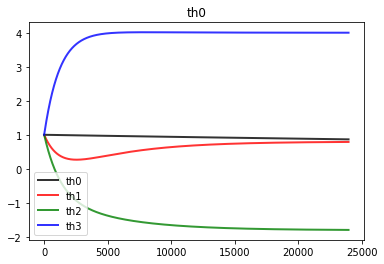

th0: 0.8662112355232239 
th1: 0.790483295917511 
th2: -1.7971913814544678 
th3: 4.002856731414795


In [6]:
# Output results
plot0, = plt.plot(epoch_log,th0_log, color='black',linewidth=2,alpha=0.8)
plot1, = plt.plot(epoch_log,th1_log, color='red',linewidth=2,alpha=0.8)
plot2, = plt.plot(epoch_log,th2_log, color='green',linewidth=2,alpha=0.8)
plot3, = plt.plot(epoch_log,th3_log, color='blue',linewidth=2,alpha=0.8)

plt.title("th0") 
plt.legend([plot0,plot1,plot2,plot3],["th0","th1",'th2','th3'])
plt.show()


print("th0:",th0_log[-1].item(),"\nth1:",th1_log[-1].item(),"\nth2:",th2_log[-1].item(),"\nth3:",th3_log[-1].item())

103.98255157470703


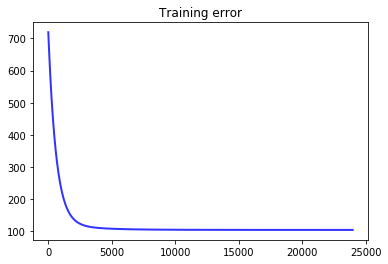

In [7]:
# 2. Plot the training error using the training dataset
plt.title("Training error")
plot, = plt.plot(epoch_log,loss_log, color='blue',linewidth=2,alpha=0.8)
print(loss_log[-1].item())

0.9118922352790833


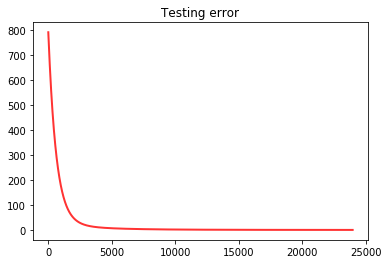

In [8]:
# 3. Plot the testing error at every iteration of gradient descent until convergence
plt.title("Testing error")
plot, = plt.plot(epoch_log,test_loss_log, color='red',linewidth=2,alpha=0.8)
print(test_loss_log[-1].item())

103.98255157470703
0.9118922352790833


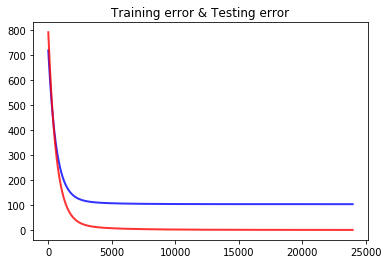

In [9]:
### Extra

plt.title("Training error & Testing error")
plot, = plt.plot(epoch_log,loss_log, color='blue',linewidth=2,alpha=0.8)
plot, = plt.plot(epoch_log,test_loss_log, color='red',linewidth=2,alpha=0.8)
print(loss_log[-1].item())
print(test_loss_log[-1].item())